## Assignment 2
### Submission by: Gurbaaz Singh Nandra | 190349

### Necessary Imports

In [43]:
from qiskit import QuantumCircuit, Aer, assemble, execute, BasicAer, transpile
from qiskit_textbook.tools import array_to_latex
from qiskit.tools.visualization import plot_histogram
import numpy as np

(15) Implement Deutsch-Jozsa Algorithm for $f:\{0,1\}^3 \rightarrow \{0,1\}$ where $f(x)=1$ for all $x$ and the starting state is $|0 \rangle |0 \rangle$. Show the circuit and state vector.

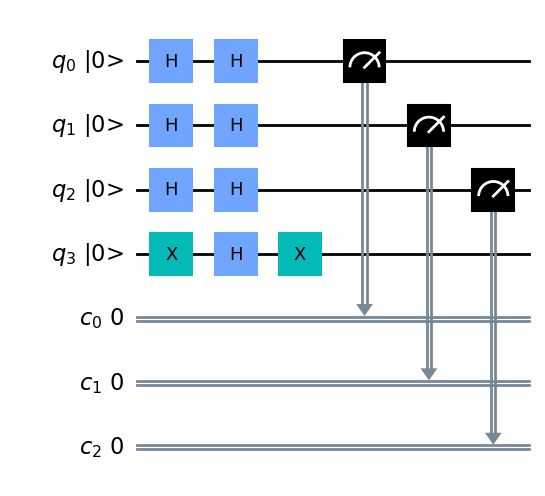

In [44]:
n = 3

# ## starting state = |0>|0>
circuit = QuantumCircuit(n+1, n)

circuit.x(n)

for qubit in range(n+1):
    circuit.h(qubit)

## f(x) = 1 for all x
circuit.x(n)

for qubit in range(n):
    circuit.h(qubit)

for i in range(n):
    circuit.measure(i, i)

circuit.draw(initial_state=True, cregbundle=False, output='mpl')

In [45]:
circuit.draw(initial_state=True, cregbundle=False, output='mpl')
#obtain a state_vector_simulator
simulator = Aer.get_backend('statevector_simulator')

#assemble the circuit
qobj = assemble(circuit)

#run simulator to get final state
final_state = simulator.run(qobj).result().get_statevector()

#display the state vector
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

(15) Implement Deutsch-Jozsa Algorithm for any balanced function $f:\{0,1\}^3 \rightarrow \{0,1\}$ (starting state is $|0 \rangle |0 \rangle$). Show the circuit and state vector.


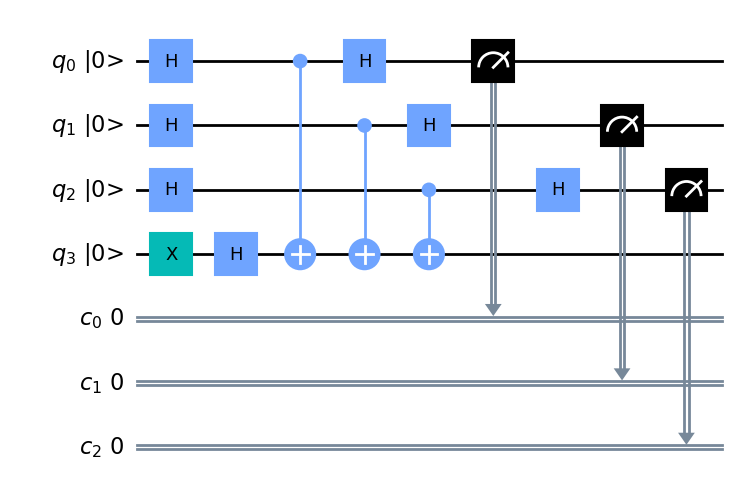

In [46]:
n = 3

# ## starting state = |0>|0>
circuit = QuantumCircuit(n+1, n)

circuit.x(n)

for qubit in range(n+1):
    circuit.h(qubit)

## f(x) = 1 for half of x, 0 for other half
for qubit in range(n):
    circuit.cx(qubit, n)

for qubit in range(n):
    circuit.h(qubit)

for i in range(n):
    circuit.measure(i, i)

circuit.draw(initial_state=True, cregbundle=False, output='mpl')

In [47]:
circuit.draw(initial_state=True, cregbundle=False, output='mpl')
#obtain a state_vector_simulator
simulator = Aer.get_backend('statevector_simulator')

#assemble the circuit
qobj = assemble(circuit)

#run simulator to get final state
final_state = simulator.run(qobj).result().get_statevector()

#display the state vector
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

(20) Built QFT circuit for 3 qubits. Make sure to put the Swap gate in the end so that the final qubits are in the right allignment. Show the circuit and action of circuit as matrix.

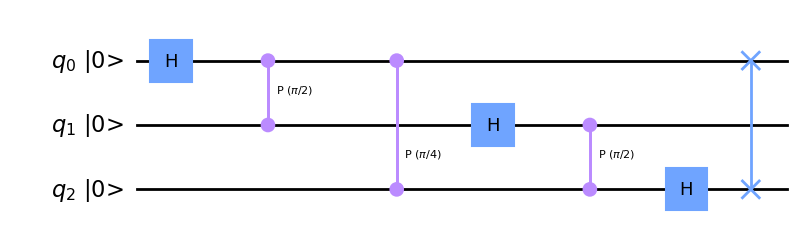

In [48]:
circuit = QuantumCircuit(3)

circuit.h(0)
circuit.cp(np.pi/2, 1, 0) # R2 from qubit 1 to qubit 0
circuit.cp(np.pi/4, 2, 0) # R2 from qubit 2 to qubit 0

circuit.h(1)
circuit.cp(np.pi/2, 2, 1) # CROT from qubit 2 to qubit 1

circuit.h(2)

circuit.swap(0, 2)

circuit.draw(initial_state=True, cregbundle=False, output='mpl')

In [49]:
#obtain a unitary_simulator
simulator = Aer.get_backend('unitary_simulator')

job = execute(circuit, simulator, shots=10000)
result = job.result()

print(result.get_unitary(circuit, 3))

Operator([[ 0.354+0.j   ,  0.354-0.j   ,  0.354-0.j   ,  0.354-0.j   ,
            0.354-0.j   ,  0.354-0.j   ,  0.354-0.j   ,  0.354-0.j   ],
          [ 0.354+0.j   ,  0.354-0.j   ,  0.354-0.j   ,  0.354-0.j   ,
           -0.354+0.j   , -0.354+0.j   , -0.354+0.j   , -0.354+0.j   ],
          [ 0.354+0.j   ,  0.354-0.j   , -0.354+0.j   , -0.354+0.j   ,
            0.   +0.354j,  0.   +0.354j, -0.   -0.354j, -0.   -0.354j],
          [ 0.354+0.j   ,  0.354-0.j   , -0.354+0.j   , -0.354+0.j   ,
           -0.   -0.354j, -0.   -0.354j,  0.   +0.354j,  0.   +0.354j],
          [ 0.354+0.j   , -0.354+0.j   ,  0.   +0.354j, -0.   -0.354j,
            0.25 +0.25j , -0.25 -0.25j , -0.25 +0.25j ,  0.25 -0.25j ],
          [ 0.354+0.j   , -0.354+0.j   ,  0.   +0.354j, -0.   -0.354j,
           -0.25 -0.25j ,  0.25 +0.25j ,  0.25 -0.25j , -0.25 +0.25j ],
          [ 0.354+0.j   , -0.354+0.j   , -0.   -0.354j,  0.   +0.354j,
           -0.25 +0.25j ,  0.25 -0.25j ,  0.25 +0.25j , -0.25 -0.25j ],